## Compare the Binary Classification Performance in Complete vs N Duration Flows Settings

In [1]:
MODEL = "rf"

     DS         TOTAL        BENIGN      ANOMALY        Anomaly breakdown      Min Pkts.   Mean Pkts.   Max Pkts.   
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_cf     7693         729          6964                                                                     
                                                    DoS GoldenEye          270          8        13.22           19 
                                                    DoS Hulk              5917          6         8.51           14 
                                                    DoS Slowhttptest       777          3         5.50           17 
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_5      7693         729          6964                                                                     
                                                    DoS GoldenEy

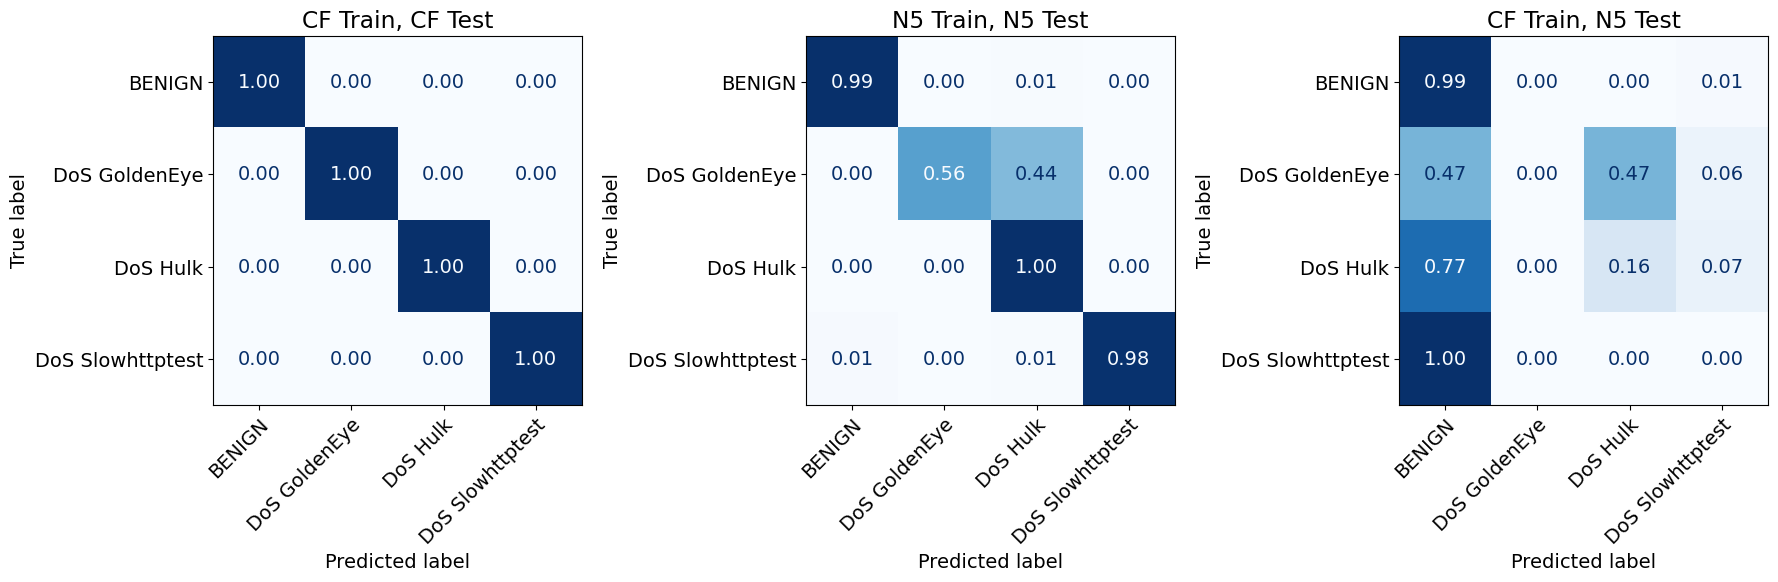

     DS         TOTAL        BENIGN      ANOMALY        Anomaly breakdown      Min Pkts.   Mean Pkts.   Max Pkts.   
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_cf    82521         1093        81428                                                                     
                                                    DoS GoldenEye          107          8        13.91           18 
                                                    DoS Hulk             81321          2         9.18           24 
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_10    82521         1093        81428                                                                     
                                                    DoS GoldenEye          107          3         9.22           14 
                                                    DoS Hulk    

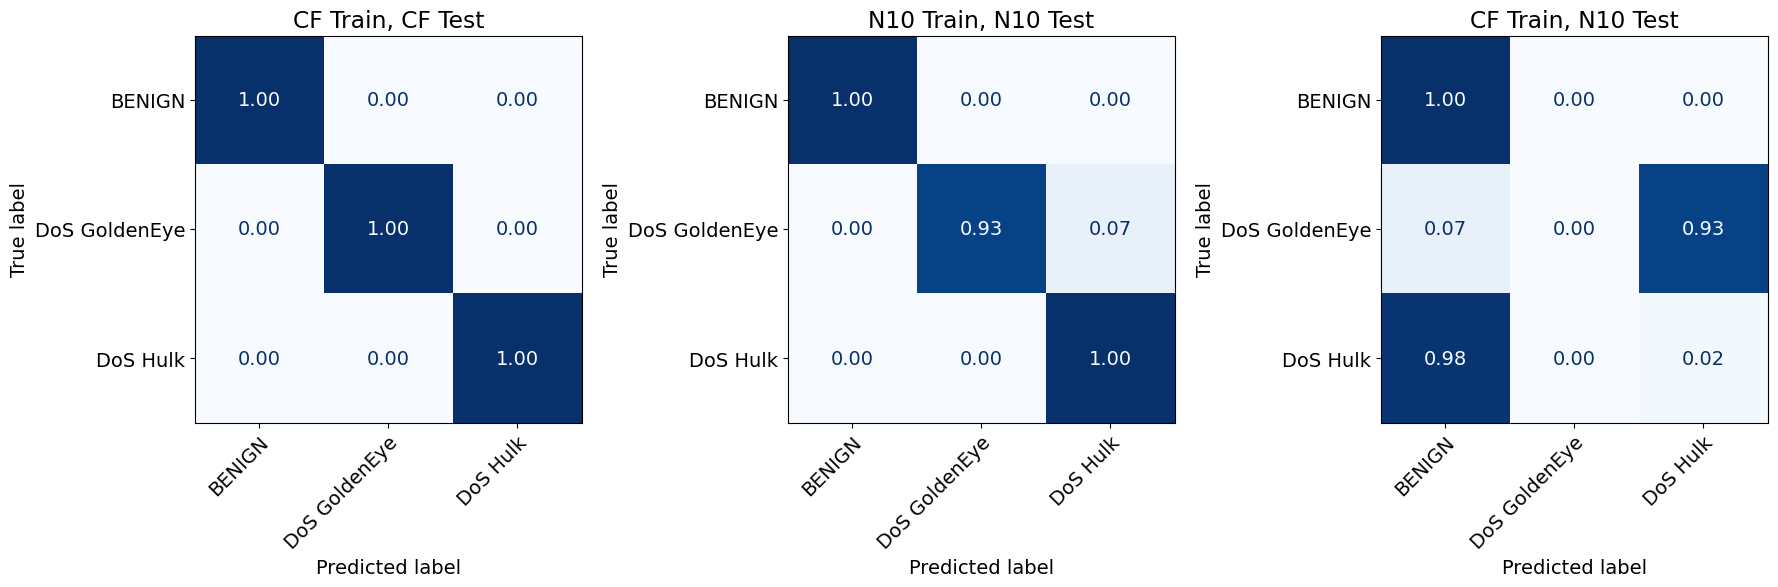

     DS         TOTAL        BENIGN      ANOMALY        Anomaly breakdown      Min Pkts.   Mean Pkts.   Max Pkts.   
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_cf    104191       37334        66857                                                                     
                                                    DoS Hulk             66738          6         8.92           15 
                                                    DoS Slowhttptest       119          3         3.13            4 
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_150    104191       37334        66857                                                                     
                                                    DoS Hulk             66738          6         7.81           11 
                                                    DoS Slowhtt

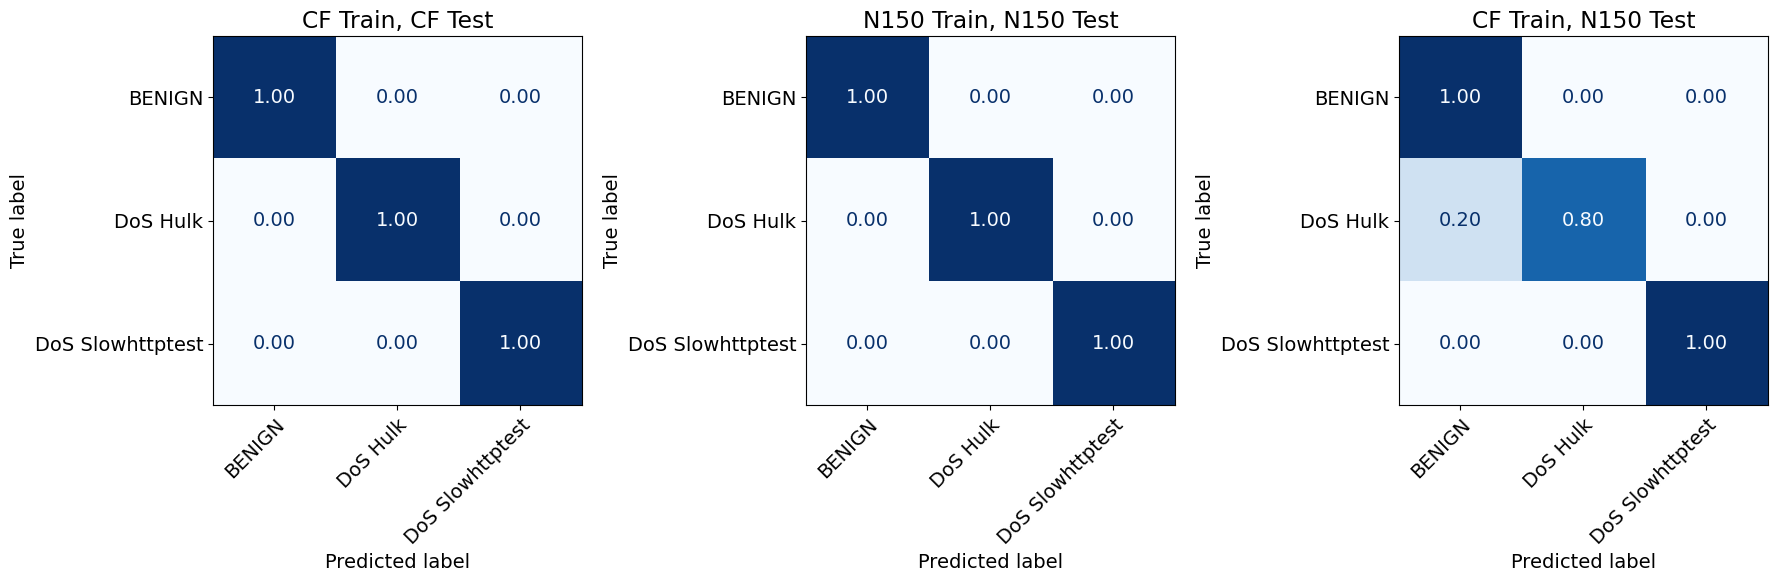

     DS         TOTAL        BENIGN      ANOMALY        Anomaly breakdown      Min Pkts.   Mean Pkts.   Max Pkts.   
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_cf    20237        17266         2971                                                                     
                                                    DoS Hulk              2832          9        11.00           13 
                                                    DoS Slowloris          139          6         6.17           25 
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_500    20237        17266         2971                                                                     
                                                    DoS Hulk              2832          8         8.18           13 
                                                    DoS Slowlor

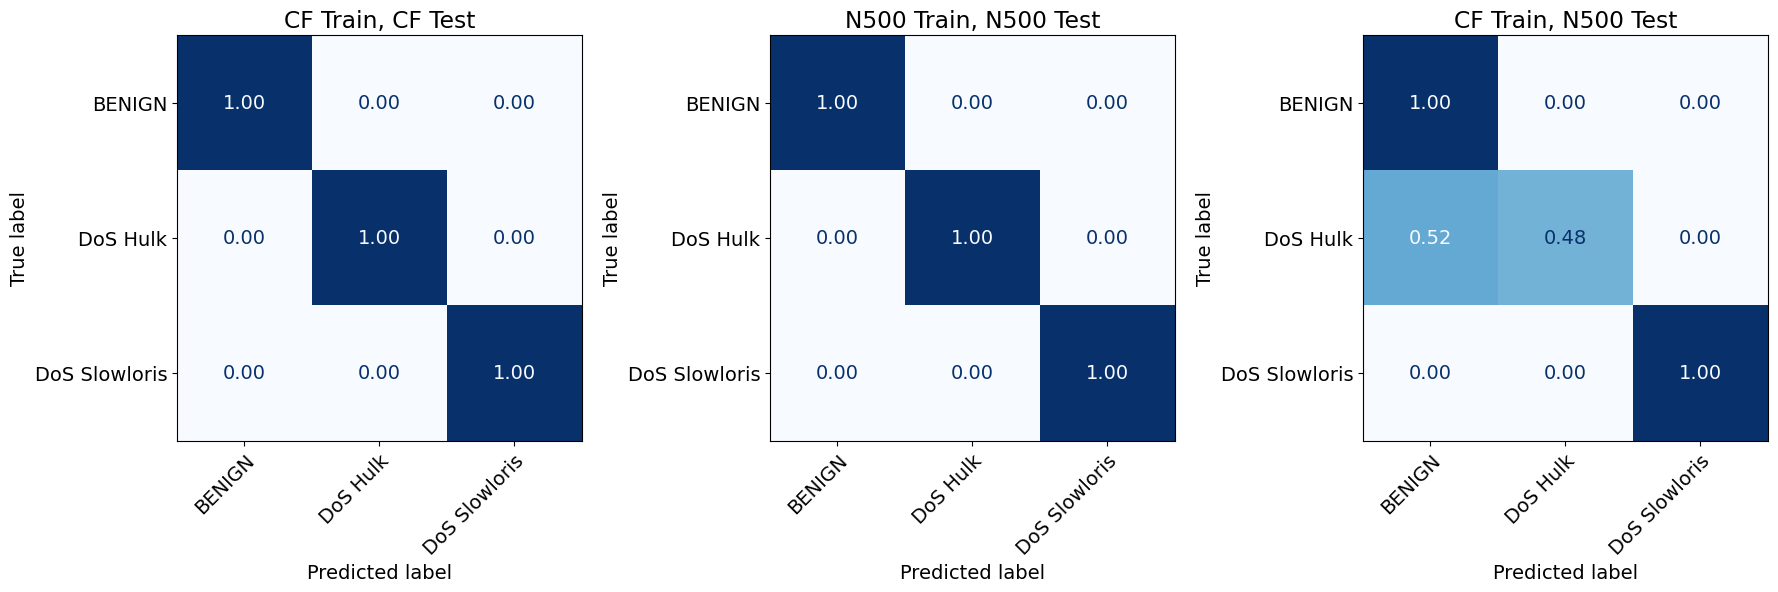

     DS         TOTAL        BENIGN      ANOMALY        Anomaly breakdown      Min Pkts.   Mean Pkts.   Max Pkts.   
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_cf    24545         9606        14939                                                                     
                                                    DoS GoldenEye          442          9        13.98           28 
                                                    DoS Hulk             13856          7        10.20           25 
                                                    DoS Slowhttptest       152          3        11.03           23 
                                                    DoS Slowloris          489          6        17.25           25 
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_1000    24545         9606        14939               

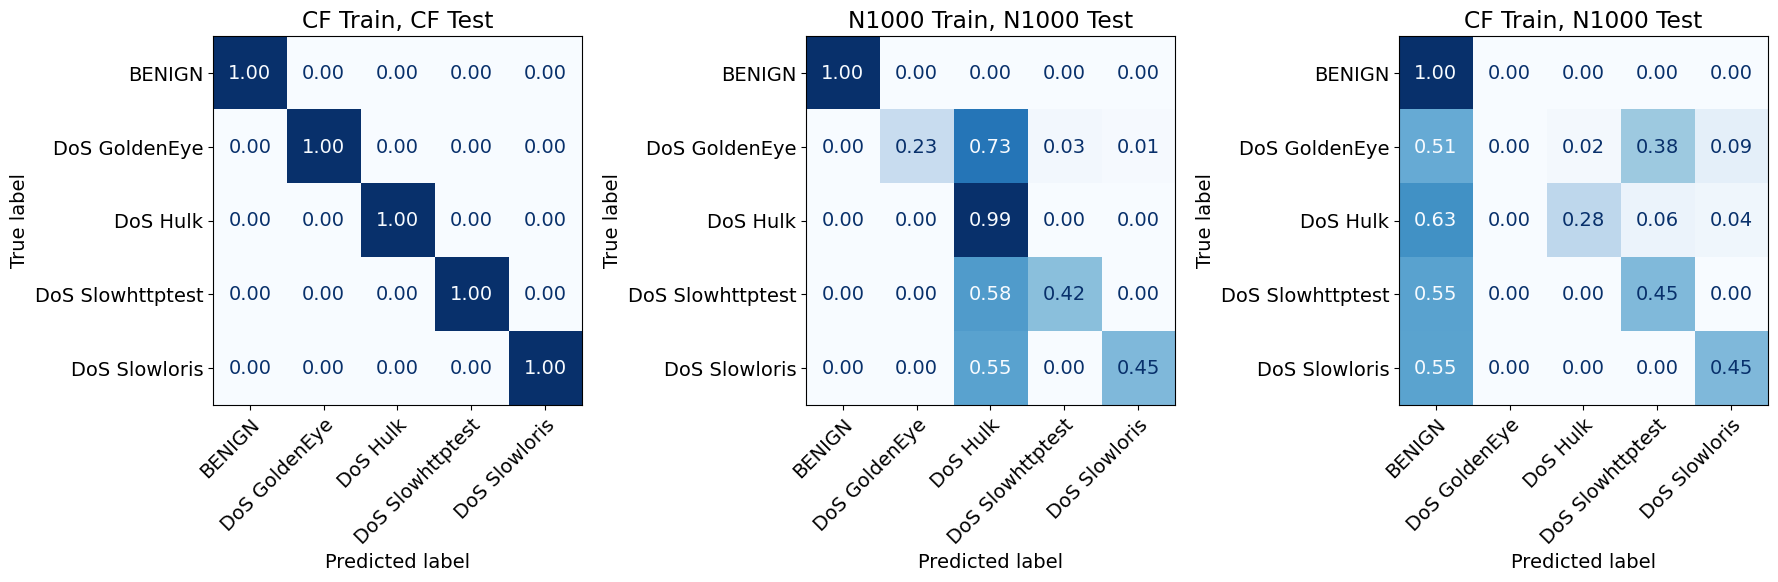

     DS         TOTAL        BENIGN      ANOMALY        Anomaly breakdown      Min Pkts.   Mean Pkts.   Max Pkts.   
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_cf     8763         4243         4520                                                                     
                                                    DoS GoldenEye          510          8        13.78           30 
                                                    DoS Hulk              3314          7        10.22           25 
                                                    DoS Slowhttptest       138         17        21.17           23 
                                                    DoS Slowloris          558          7        18.23           25 
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_15000     8763         4243         4520              

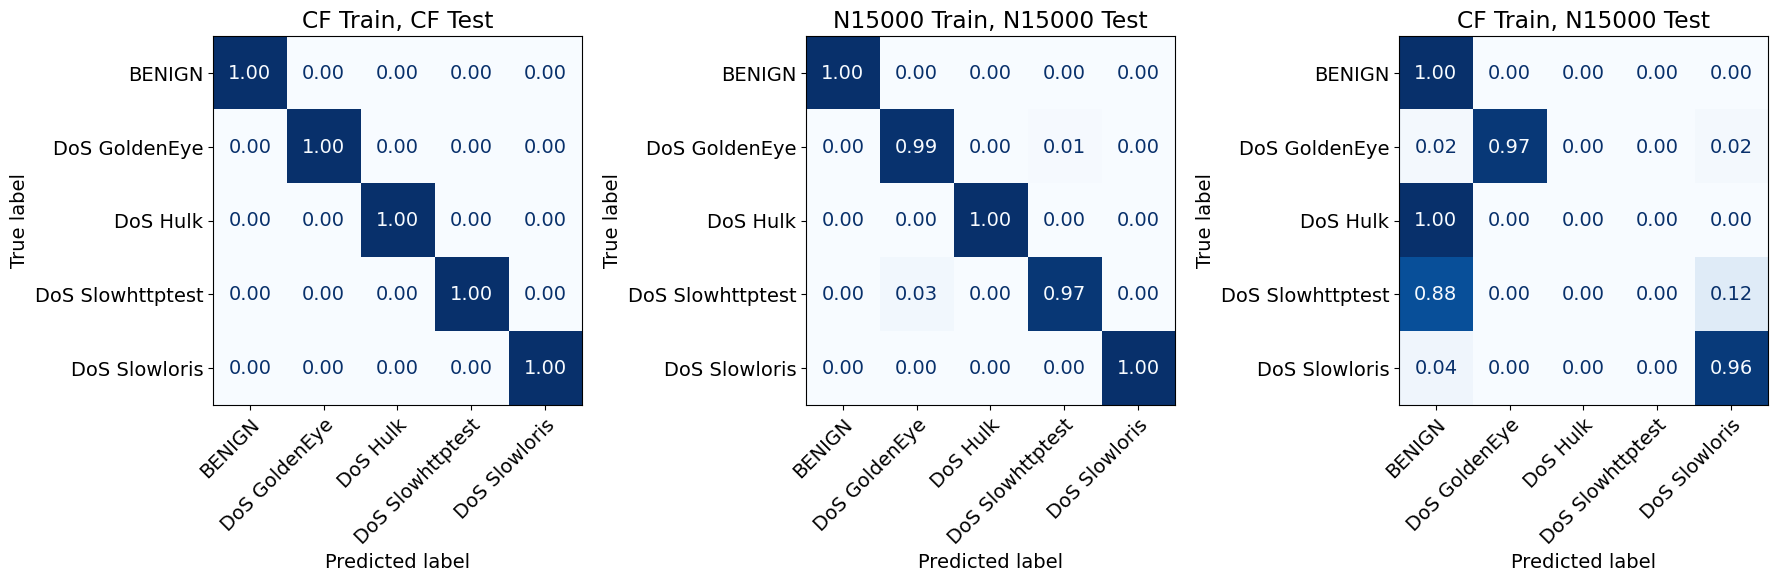

     DS         TOTAL        BENIGN      ANOMALY        Anomaly breakdown      Min Pkts.   Mean Pkts.   Max Pkts.   
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_cf    30545        29864         681                                                                      
                                                    DoS GoldenEye          341          8        14.23           24 
                                                    DoS Slowhttptest       340          3         6.15           21 
------------ ------------ ------------ ------------ -------------------------- ---------- ------------ ------------ 
wednesday_20000    30545        29864         681                                                                      
                                                    DoS GoldenEye          341          8        14.11           24 
                                                    DoS Slowh

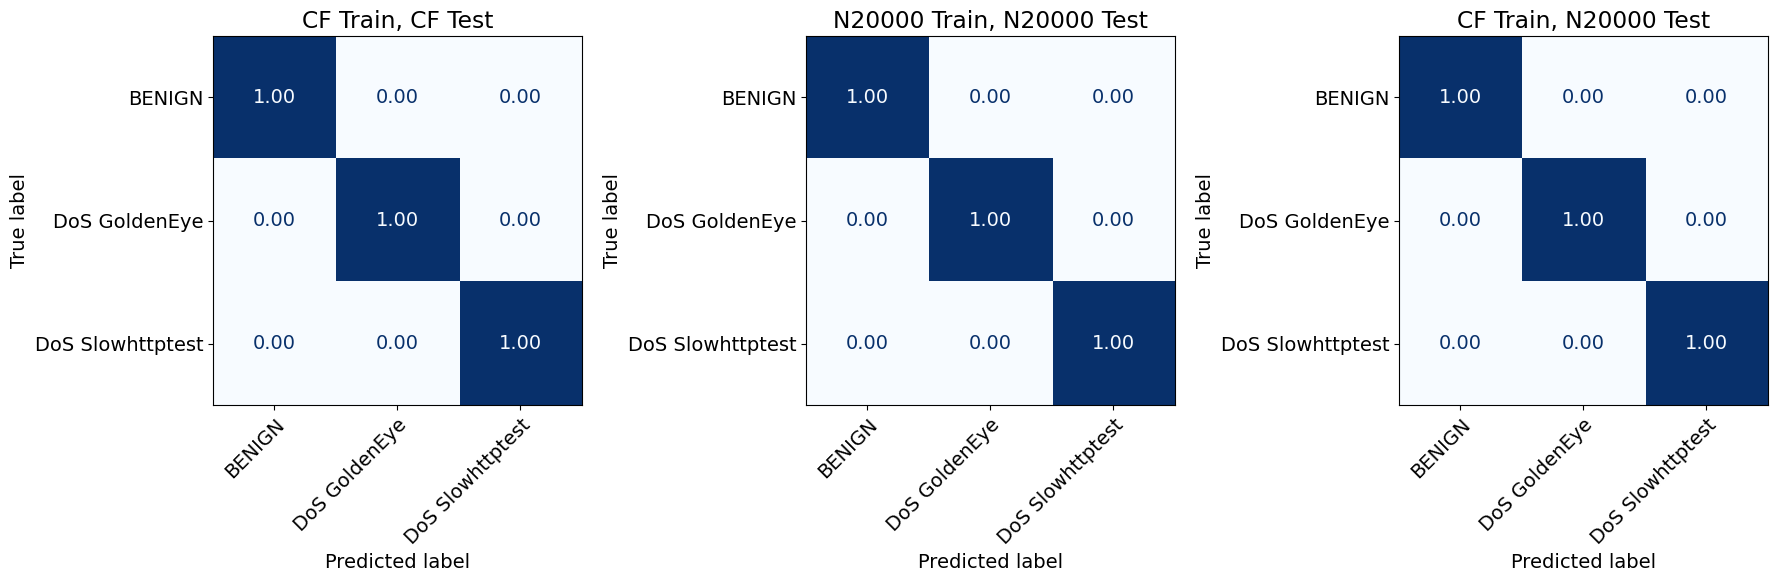

In [2]:
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import warnings

def process_dataframes(dfs, n_values, day):    
    warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

    # Define table formatting
    header = ["DS", "TOTAL", "BENIGN", "ANOMALY", "Anomaly breakdown", "Min Pkts.", "Mean Pkts.", "Max Pkts."]
    rowh = "{:^12} " * 4 + "{:^26} " + "{:^10} " + "{:^12} " + "{:^12} "
    row  = "{:^12} " * 4 + "{:<18}  " + "{:>6} " + "{:>10} " + "{:>12} " + "{:>12} "
    sep  = ["-"*12] * 4 + ["-"*26] + ["-"*10] + ["-"*12] + ["-"*12]

    # Print header
    print(rowh.format(*header))

    # Process each DataFrame
    for n, csv in zip(n_values, dfs):
        print(rowh.format(*sep))  # Separator line

        # Compute statistics
        TOTAL = len(csv)
        BENIGN = len(csv[csv["label"] == "BENIGN"])
        ANOMALY = len(csv[(csv["label"] != "BENIGN")])

        # Print the DataFrame summary
        print(row.format(day + '_' + str(n), TOTAL, BENIGN, ANOMALY, "", "", "", "", ""))

        # Iterate through each unique label
        for label in sorted(csv["label"].unique().tolist()):
            if label in ["BENIGN"]:
                continue  # Skip benign and NaN labels

            # Calculate duration statistics for each anomaly
            anomaly_data = csv[csv["label"] == label]['bidirectional_packets']
            min_duration = np.min(anomaly_data) if not anomaly_data.empty else 0
            mean_duration = np.mean(anomaly_data) if not anomaly_data.empty else 0
            max_duration = np.max(anomaly_data) if not anomaly_data.empty else 0
            
            # Print anomaly statistics
            print(row.format("", "", "", "", label, len(csv[csv["label"] == label]), min_duration, "{:.2f}".format(mean_duration), max_duration))


# Function to evaluate model, store metrics, and return confusion matrix for plotting
def evaluate_and_store_results(y_true, y_pred, dataset_name):
    # Compute both non-normalized and normalized confusion matrices
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = confusion_matrix(y_true, y_pred, normalize='true')

    # Calculate individual metrics for multi-class classification
    # precision = precision_score(y_true, y_pred, average=None)  # Returns score for each class
    # recall = recall_score(y_true, y_pred, average=None)
    # f1 = f1_score(y_true, y_pred, average=None)
    
    # Calculate average metrics for overall evaluation
    precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        # 'Precision': precision.tolist(),  # Convert numpy array to list for JSON compatibility
        # 'Recall': recall.tolist(),
        # 'F1 Score': f1.tolist(),
        'Macro Precision': precision_macro,
        'Macro Recall': recall_macro,
        'Macro F1 Score': f1_macro,
        'Classification Report': classification_report(y_true, y_pred, output_dict=True, zero_division=0),
        'Confusion Matrix': cm.tolist(),  # Store the non-normalized confusion matrix
        'Normalized Confusion Matrix': cm_normalized.tolist()  # Store the normalized confusion matrix
    }
    
    metrics_dict[dataset_name] = metrics  # Store metrics
    print(f"{dataset_name}") 
    print(f"Accuracy: {metrics['Accuracy']:.4f}, Balanced Accuracy: {metrics['Balanced Accuracy']:.4f}")
    # print(f"Precision (per class): {metrics['Precision']}")
    # print(f"Recall (per class): {metrics['Recall']}")
    # print(f"F1 Score (per class): {metrics['F1 Score']}")
    print(f"Macro Precision: {metrics['Macro Precision']:.4f}, Macro Recall: {metrics['Macro Recall']:.4f}, Macro F1 Score: {metrics['Macro F1 Score']:.4f}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}\n")
    return cm_normalized  # Return normalized matrix for plotting

# Set global default font size for all plots
plt.rcParams.update({'font.size': 14})

# Define the columns to keep
columns_to_keep = [
    "protocol", 
    "bidirectional_duration_ms", "bidirectional_packets", "bidirectional_bytes",
    "src2dst_duration_ms", "src2dst_packets", "src2dst_bytes",
    "dst2src_duration_ms", "dst2src_packets",  "dst2src_bytes",
    "bidirectional_min_ps", "bidirectional_mean_ps", "bidirectional_stddev_ps", "bidirectional_max_ps", 
    "src2dst_min_ps", "src2dst_mean_ps", "src2dst_stddev_ps", "src2dst_max_ps",
    "dst2src_min_ps", "dst2src_mean_ps", "dst2src_stddev_ps", "dst2src_max_ps",
    "bidirectional_min_piat_ms", "bidirectional_mean_piat_ms", "bidirectional_stddev_piat_ms", "bidirectional_max_piat_ms", 
    "src2dst_min_piat_ms", "src2dst_mean_piat_ms", "src2dst_stddev_piat_ms", "src2dst_max_piat_ms", 
    "dst2src_min_piat_ms", "dst2src_mean_piat_ms", "dst2src_stddev_piat_ms", "dst2src_max_piat_ms",
    "bidirectional_syn_packets", "bidirectional_cwr_packets", "bidirectional_ece_packets", "bidirectional_urg_packets",
    "bidirectional_ack_packets", "bidirectional_psh_packets", "bidirectional_rst_packets", "bidirectional_fin_packets",
    "src2dst_syn_packets", "src2dst_cwr_packets", "src2dst_ece_packets", "src2dst_urg_packets",
    "src2dst_ack_packets", "src2dst_psh_packets", "src2dst_rst_packets", "src2dst_fin_packets",
    "dst2src_syn_packets", "dst2src_cwr_packets", "dst2src_ece_packets", "dst2src_urg_packets",
    "dst2src_ack_packets", "dst2src_psh_packets", "dst2src_rst_packets", "dst2src_fin_packets",    
]

RESULTS_DIR = "results"
CSV_DIR = "datasets"
DAY = "wednesday"

CF = 'cf'
Ns = [5, 10, 150, 500, 1000, 15000, 20000] 

# Initialize a dictionary to store all metrics
all_metrics_dict = {}

# Load the constant cf dataframe
df1 = pd.read_parquet(os.path.join(CSV_DIR, f'wednesday_{CF}.parquet'))

# Main cycle
for n in Ns:
    # Load each N dataframe
    df2 = pd.read_parquet(os.path.join(CSV_DIR, f'wednesday_fd_{n}.parquet'))
    
    df1_filtered = df1[df1['flow_key_hash'].isin(df2['flow_key_hash'])][columns_to_keep + ['label', 'flow_key_hash']]
    df2_filtered = df2[df2['flow_key_hash'].isin(df1['flow_key_hash'])][columns_to_keep + ['label', 'flow_key_hash']]

    process_dataframes([df1_filtered, df2_filtered], [CF,n], DAY)
    
    # Train-test split based on 'forward_hash'
    _, test_hashes = train_test_split(df1_filtered['flow_key_hash'], test_size=0.25, random_state=42, stratify=df1_filtered['label'])
    train_mask_df1 = ~df1_filtered['flow_key_hash'].isin(test_hashes)
    test_mask_df1 = df1_filtered['flow_key_hash'].isin(test_hashes)
    train_mask_df2 = ~df2_filtered['flow_key_hash'].isin(test_hashes)
    test_mask_df2 = df2_filtered['flow_key_hash'].isin(test_hashes)
    
    # Preparing training and testing sets
    X_train_1, X_test_1 = df1_filtered[train_mask_df1][columns_to_keep], df1_filtered[test_mask_df1][columns_to_keep]
    y_train_1, y_test_1 = df1_filtered[train_mask_df1]['label'], df1_filtered[test_mask_df1]['label']
    X_train_2, X_test_2 = df2_filtered[train_mask_df2][columns_to_keep], df2_filtered[test_mask_df2][columns_to_keep]
    y_train_2, y_test_2 = df2_filtered[train_mask_df2]['label'], df2_filtered[test_mask_df2]['label']

    if MODEL == "dt":
        # Initialize and train Decision Tree classifiers
        clf1 = DecisionTreeClassifier(random_state=42).fit(X_train_1, y_train_1)
        clf2 = DecisionTreeClassifier(random_state=42).fit(X_train_2, y_train_2)
    if MODEL == "rf":
        # Initialize and train Random Forest classifier
        clf1 = RandomForestClassifier(random_state=42).fit(X_train_1, y_train_1)
        clf2 = RandomForestClassifier(random_state=42).fit(X_train_2, y_train_2)

    # Dictionary to store all metrics
    metrics_dict = {}

    # Evaluate and plot results
    titles = [f'{CF.upper()} Train, {CF.upper()} Test', f'N{n} Train, N{n} Test', f'{CF.upper()} Train, N{n} Test']
    predictions = [clf1.predict(X_test_1), clf2.predict(X_test_2), clf1.predict(X_test_2)]
    tests = [y_test_1, y_test_2, y_test_2]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, title, y_test, y_pred in zip(axes.flat, titles, tests, predictions):
        cm = evaluate_and_store_results(y_test, y_pred, title)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
        disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False, values_format='.2f')
        ax.title.set_text(title)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    plt.tight_layout()
    plt.show()
    
    all_metrics_dict[f'FD{n}'] = metrics_dict  # Store the metrics for this round using N{n} as the key

# After the loop, write all_metrics_dict to a single JSON file
output_dir = RESULTS_DIR
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

file_name = f'{MODEL}_multi_{CF}_fdf_evaluation_metrics.json'  # Updated file name to reflect consolidated metrics
destination = os.path.join(output_dir, file_name)

with open(destination, 'w') as f:
    json.dump(all_metrics_dict, f, indent=4)